# **Parkinsons Prediction**

## **Data Cleaning**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/parkinsons.csv')

pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(['name'],axis=1,inplace=True)

## **EDA**

In [ ]:
#univarient analysis

df['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


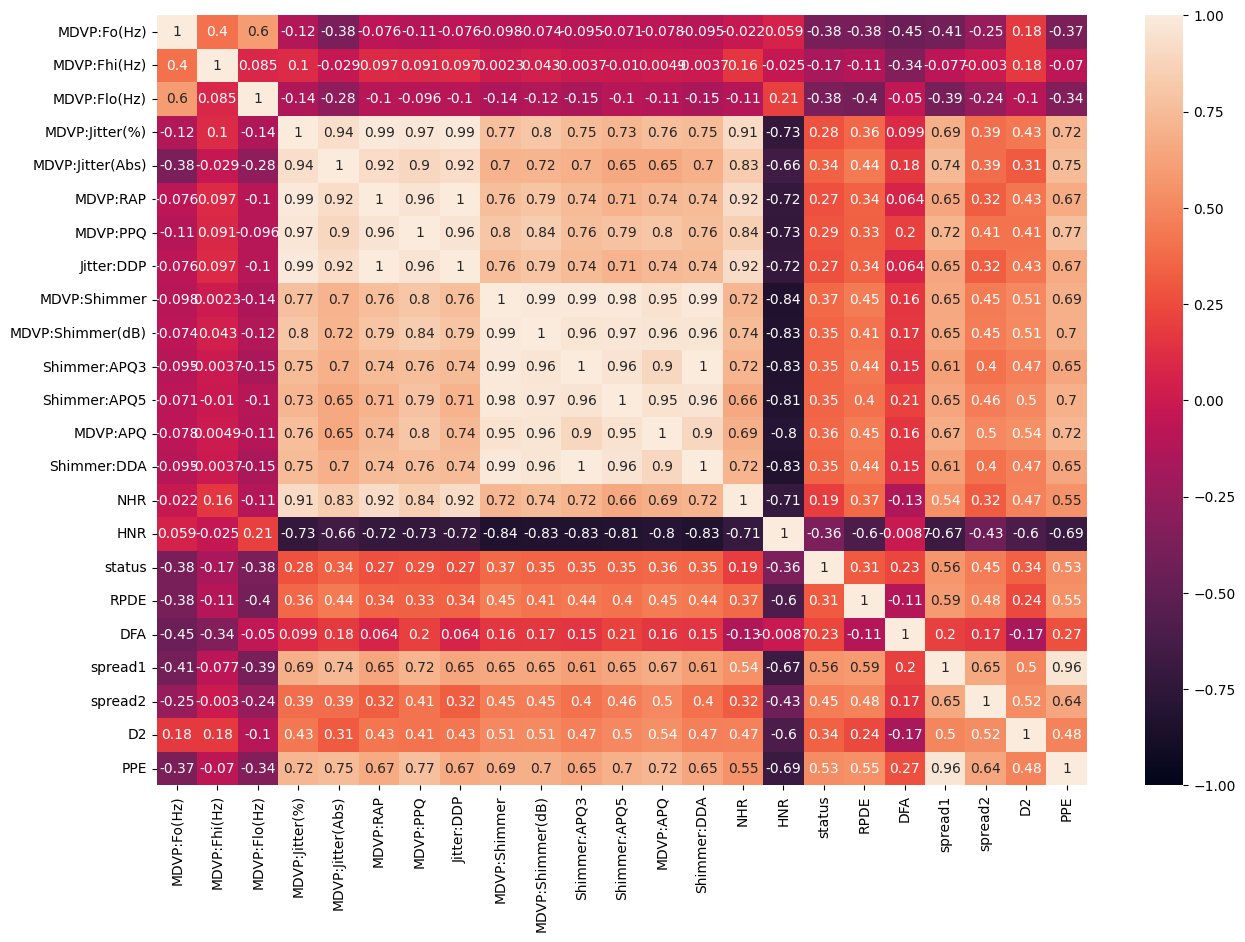

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,vmin=-1,vmax=1)
plt.show()

## **Feature Selection**



In [ ]:
#Mostly all features correlated with target so choose all the features

corr=df.corr()
corr['status'].sort_values(ascending=False)

,status
status,1.000000
spread1,0.564838
PPE,0.531039
spread2,0.454842
MDVP:Shimmer,0.367430
MDVP:APQ,0.364316
Shimmer:APQ5,0.351148
MDVP:Shimmer(dB),0.350697
Shimmer:APQ3,0.347617
Shimmer:DDA,0.347608


In [ ]:
x=df.drop(['status'],axis=1)
y=df['status']

## **Balancing a Data**

In [ ]:
y.value_counts()

,count
status,
1,147
0,48


In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

In [ ]:
y_smote.value_counts()

,count
status,
1,147
0,147


## **Data Preprocessing**

### **Applying Scaling Technique**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_smote=scaler.fit_transform(x_smote)

In [ ]:
x_smote

array([[-0.88354261, -0.50808736, -0.9789481 , ...,  0.73209428,
        -0.03036518,  1.23117   ],
       [-0.8319561 , -0.60099997, -0.18906807, ...,  1.58867817,
         0.49679421,  2.22149004],
       [-0.95445263, -0.78934881, -0.23513186, ...,  1.28603291,
         0.0856842 ,  1.79669673],
       ...,
       [ 1.81450598,  0.72100407,  2.35897588, ..., -0.45856263,
        -0.65453987, -1.00503493],
       [-0.62021297,  3.66218269, -0.6634213 , ..., -0.90749922,
        -0.46242735, -0.52264621],
       [ 2.07319902,  0.62823977,  2.31237206, ..., -0.5855871 ,
        -1.10411463, -1.1778177 ]])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install catboost

In [ ]:
import catboost
print(catboost.__version__)

1.2.8


## **Finding the Best Model with Best Random State**

### **1.LogisticRegression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

best_score=0
for i in range(43):
  x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=i)
  lr=LogisticRegression()
  lr.fit(x_train,y_train)
  lr.predict_proba(x_test)[:,1]
  auc_score=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

  if auc_score > best_score:
      best_score=auc_score
      best_rs=i
print(f'ran:{best_rs},auc_score:{best_score}')

ran:6,auc_score:0.9678160919540231


**Evaluation Metrics**

Accuracy Score: 0.9491525423728814
Precision Score: 0.9333333333333333
Recall Score: 0.9655172413793104
F1 Score: 0.9491525423728814
Confusion Matrix: 
[[28  2]
 [ 1 28]]
AUC: 0.9678160919540231


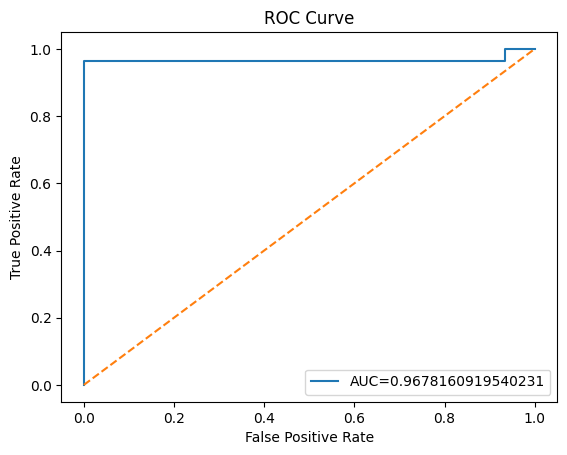

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=6)

cm=confusion_matrix(y_test,lr.predict(x_test))
ac=accuracy_score(y_test,lr.predict(x_test))
pr=precision_score(y_test,lr.predict(x_test))
re=recall_score(y_test,lr.predict(x_test))
f1=f1_score(y_test,lr.predict(x_test))
auc=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### **2.Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=i)
  dt=DecisionTreeClassifier(max_depth=10)
  dt.fit(x_train,y_train)
  dt.predict_proba(x_test)[:,1]
  auc_score=roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

  if auc_score > best_score:
      best_score=auc_score
      best_rs=i
print(f'ran:{best_rs},auc_score:{best_score}')

ran:42,auc_score:1.0


**Evaluation Metrics**

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[30  0]
 [ 0 29]]
AUC: 1.0


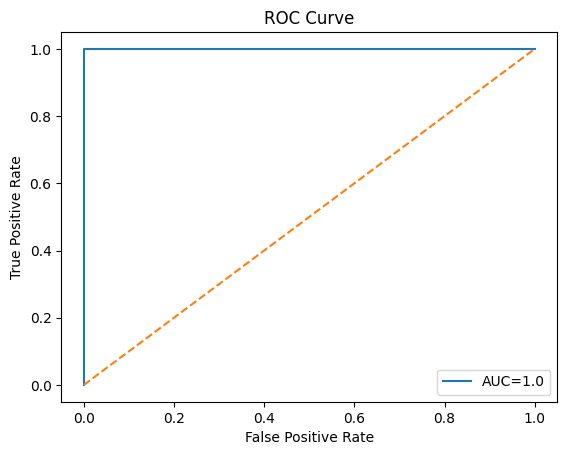

In [ ]:


cm=confusion_matrix(y_test,dt.predict(x_test))
ac=accuracy_score(y_test,dt.predict(x_test))
pr=precision_score(y_test,dt.predict(x_test))
re=recall_score(y_test,dt.predict(x_test))
f1=f1_score(y_test,dt.predict(x_test))
auc=roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=dt.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### **KNearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=i)
  knn=KNeighborsClassifier(n_neighbors=12,weights='distance')
  knn.fit(x_train,y_train)
  knn.predict_proba(x_test)[:,1]
  auc_score=roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])

  if auc_score > best_score:
      best_score=auc_score
      best_rs=i
print(f'ran:{best_rs},auc_score:{best_score}')

ran:1,auc_score:1.0


**Evaluation Metrics**

Accuracy Score: 0.9661016949152542
Precision Score: 1.0
Recall Score: 0.9333333333333333
F1 Score: 0.9655172413793104
Confusion Matrix: 
[[29  0]
 [ 2 28]]
AUC: 1.0


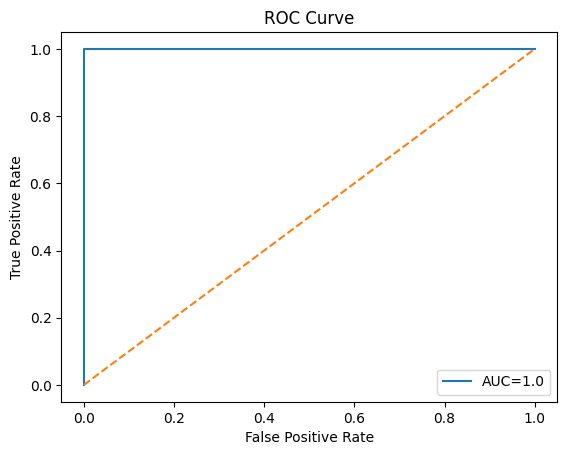

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=1)
knn=KNeighborsClassifier(n_neighbors=12,weights='distance')
knn.fit(x_train,y_train)

cm=confusion_matrix(y_test,knn.predict(x_test))
ac=accuracy_score(y_test,knn.predict(x_test))
pr=precision_score(y_test,knn.predict(x_test))
re=recall_score(y_test,knn.predict(x_test))
f1=f1_score(y_test,knn.predict(x_test))
auc=roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **Ensemble Moduls-(Bagging and Boosting)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=i)
  rd=RandomForestClassifier(max_depth=10)
  rd.fit(x_train,y_train)
  rd.predict_proba(x_test)[:,1]
  auc_score=roc_auc_score(y_test,rd.predict_proba(x_test)[:,1])

  if auc_score > best_score:
      best_score=auc_score
      best_rs=i
print(f'ran:{best_rs},auc_score:{best_score}')

ran:7,auc_score:1.0


**Evaluation Metrics**

Accuracy Score: 0.9661016949152542
Precision Score: 1.0
Recall Score: 0.9428571428571428
F1 Score: 0.9705882352941176
Confusion Matrix: 
[[24  0]
 [ 2 33]]
AUC: 1.0


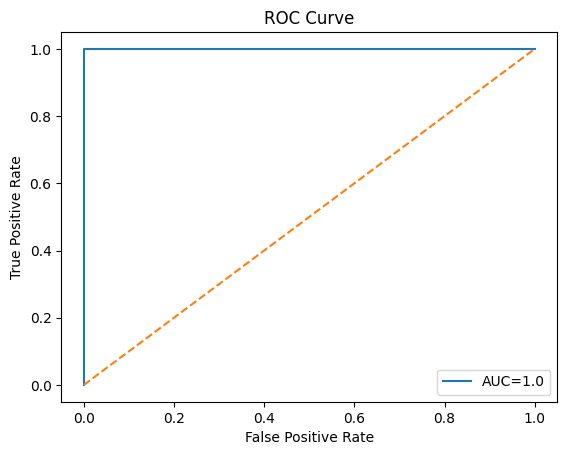

In [ ]:
 x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=7)
 rd=RandomForestClassifier(max_depth=10)
 rd.fit(x_train,y_train)

cm=confusion_matrix(y_test,rd.predict(x_test))
ac=accuracy_score(y_test,rd.predict(x_test))
pr=precision_score(y_test,rd.predict(x_test))
re=recall_score(y_test,rd.predict(x_test))
f1=f1_score(y_test,rd.predict(x_test))
auc=roc_auc_score(y_test,rd.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=rd.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Pipeline for run multiple models but More Time complicity

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# import lightgbm as lgb
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.metrics import *
# from imblearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV


# results={}
# for i in range(43):
#   x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=i)

#   models={
#       'Logistic Regression':(LogisticRegression(),{}),
#       'KNN':(KNeighborsClassifier(),{'model__n_neighbors':[3,4,5,6,7,8,9,10],'model__weights':['uniform','distance']}),
#       'Decision Tree':(DecisionTreeClassifier(),{'model__max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],'model__criterion':['gini','entropy']}),
#       'Random Forest':(RandomForestClassifier(),{'model__max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],'model__criterion':['gini','entropy']}),
#       'LightGBM':(lgb.LGBMClassifier(),{'model__max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],'model__criterion':['gini','entropy']}),
#       'XGBoost':(XGBClassifier(), {}),
#       'CatBoost':(CatBoostClassifier(verbose=0),{})}

#   for name,(model,params) in models.items():
#     pipe=Pipeline([
#                    ('model',model)])

#     grid = GridSearchCV(pipe,params,cv=3,scoring='roc_auc')
#     grid.fit(x_train,y_train)

#     y_hat = grid.predict(x_test)
#     acc = accuracy_score(y_test,y_hat)
#     f1 = f1_score(y_test,y_hat)
#     recall = recall_score(y_test,y_hat)
#     precision = precision_score(y_test,y_hat)

#     y_hat_prob = grid.predict_proba(x_test)[:,1]
#     auc = roc_auc_score(y_test,y_hat_prob)


#     results[name] = {
#         'best_params':grid.best_params_,
#         'accuracy':acc,
#         'f1_score':f1,
#         'recall':recall,
#         'precision':precision,
#         'auc':auc
#     }

## **Final Model (Desicion Tree)**

## **Saving the model**

In [ ]:
import pickle

with open('model_1.pkl','wb') as f:
  pickle.dump(dt,f)

In [ ]:
with open('model_1.pkl','rb') as e:
  des=pickle.load(e)

In [ ]:
with open('scaler_1.pkl','wb') as f:
  pickle.dump(scaler,f)

## **Test the Model**

In [ ]:
des

DecisionTreeClassifier(max_depth=10)

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[30  0]
 [ 0 29]]
AUC: 1.0


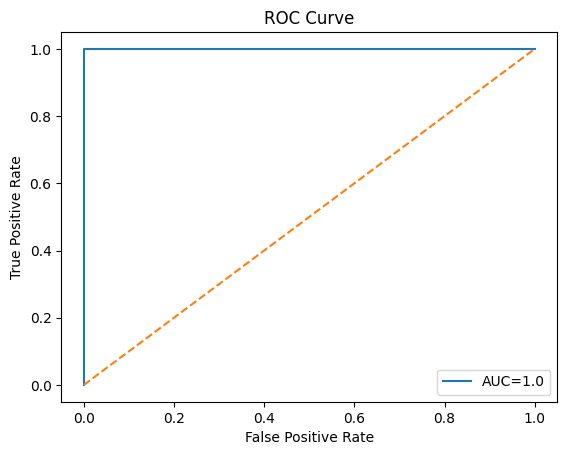

In [ ]:
cm=confusion_matrix(y_test,des.predict(x_test))
ac=accuracy_score(y_test,des.predict(x_test))
pr=precision_score(y_test,des.predict(x_test))
re=recall_score(y_test,des.predict(x_test))
f1=f1_score(y_test,des.predict(x_test))
auc=roc_auc_score(y_test,des.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=des.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()